Даны два списка, которые совпадают до элемента N, а потом перестают совпадпать <br/>
Ответом должно быть количество совпавших элементов

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 6, 6, 8]
y = [0, 1, 2, 3, 4, 5, 6, 6, 6, 9]

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 6, 6,       7, 8, 8, 9, 10, 11, 15, 18, 36, 275, 555, 444, 785] #совпадают первые 9 чисел
y = [0, 1, 2, 3, 4, 5, 6, 6, 6,     14, 8, 16, 18, 20, 22, 30, 36, 72, 450, 556, 333, 235]

Без дубликатов до и после:

In [ ]:
def my_fun(x, y):
    if len(x) != len(y):
        print('Списки разной длины')
    if x == y:
        print('Списки целиком идентичны') #либо return/print( len(x) )
    else:
        return len(x) - len(set(x) - set(y))

Общее решение:

In [ ]:
def my_fun(x, y):
    if len(x) != len(y):
        print('Списки разной длины')
    if x == y:
        print('Списки целиком идентичны')
    else:
        M = 0
        for i in range(len(x)):
                if x[i] == y[i]:
                    M += 1
                    #print(x[i], y[i], '  i==k')
                if x[i] != y[i]:
                    #print(x[i], y[i], '  i != k')
                    break
        return M

In [ ]:
my_fun(x, y)

pandas

In [230]:
import pandas as pd

In [231]:
table1 = pd.read_csv('data - table1.csv')
table2 = pd.read_csv('data - table2.csv')

Выбрать строки из первый таблицы которые соответствуют шаблону (датам) второй таблицы:

In [232]:
def table_filtering(table1, table2):
    table_filtered = pd.DataFrame() #пустой датафрейм в который будем конкатенировать строки

    for i in range(len(table2)): #итерируемся по длине второй таблицы

        #временная таблица с нужными строками из диапазона второй таблицы
        temp = table1.where(table1['date'] >= table2.loc[i][1]         #отвечает за начальную дату
                            ).where(table1['date'] <= table2.loc[i][2] #отвечает за конечную дату
                                    ).where(table1['id'] == table2.loc[i][0]).dropna() #отвечает за id


        table_filtered = pd.concat(
            (table_filtered, temp),
             axis='rows', ignore_index=True)
        #конкатенируем строки каждого нового столбца в общий df
        
    return table_filtered

table_filtering(table1, table2)

,id,date,qty
0,1.0,2022.10.12,0.314512
1,1.0,2022.10.13,-0.011784
2,1.0,2022.10.14,0.780512
3,1.0,2022.10.15,-0.018605
4,1.0,2022.10.16,0.341738
...,...,...,...
203,4.0,2022.11.22,0.481018
204,4.0,2022.11.23,0.802485
205,4.0,2022.11.24,-0.235498
206,4.0,2022.11.25,1.415409


# След задание

Выбрать наиболее похожего и наиболее непохожего на id1 представителя

In [235]:
table_filtered = table_filtering(table1, table2)

In [253]:
table_filtered.where(table_filtered['id'] == 4).dropna().describe()

,id,qty
count,55.0,55.000000
mean,4.0,0.542296
std,0.0,0.487630
min,4.0,-0.479332
25%,4.0,0.201875
50%,4.0,0.502193
75%,4.0,0.999193
max,4.0,1.672597


In [311]:
table_filtered['qty'].where(table_filtered['id'] == 1).dropna().min()

-1.956783012

In [321]:
for i in range(1, 5):
    min = table_filtered['qty'].where(table_filtered['id'] == i).dropna().min()
    mean = table_filtered['qty'].where(table_filtered['id'] == i).dropna().mean()
    max = table_filtered['qty'].where(table_filtered['id'] == i).dropna().max()
    std = table_filtered['qty'].where(table_filtered['id'] == i).dropna().std()
    print(f'id={i}, qty min={min:6f}, mean={mean:6f}, max={max:6f}, std={std:6f}')

id=1, qty min=-1.956783, mean=0.015232, max=1.708598, std=0.784834
id=2, qty min=-3.328456, mean=0.301730, max=4.467876, std=1.825293
id=3, qty min=-3.333149, mean=0.784084, max=5.316510, std=2.051934
id=4, qty min=-0.479332, mean=0.542296, max=1.672597, std=0.487630


id 1, qty min=-1.956783, mean=0.015232, max=1.708598, std=0.784834 <br/>
id 2, qty min=-3.328456, mean=0.301730, max=4.467876, std=1.825293 <br/>
id 3, qty min=-3.333149, mean=0.784084, max=5.316510, std=2.051934 <br/>
id 4, qty min=-0.479332, mean=0.542296, max=1.672597, std=0.487630 <br/>

Ближайшиt к id=1 - id=2 по min, mean, и id=4 по max, std 

In [254]:
import seaborn as sns

<AxesSubplot:xlabel='id', ylabel='qty'>

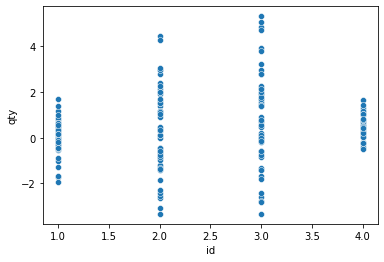

In [297]:
sns.scatterplot(data = table_filtered, x="id", y='qty')


# Штуки которые показались мне полезными

In [233]:
table1['id'].value_counts() #id только заданные, по 59

1    59
2    59
3    59
4    59
Name: id, dtype: int64

In [37]:
table2.loc[0][2]

Timestamp('2022-11-23 00:00:00')

In [224]:
table1['date'] = table1['date'].astype('datetime64')
table2['date_start'] = table2['date_start'].astype('datetime64')
table2['date_end'] = table2['date_end'].astype('datetime64')
#приводим дату к типу дата

In [95]:
pd.bdate_range(start= table2.loc[0][1], end=table2.loc[0][2]) #только с рабочими днями

DatetimeIndex(['2022-10-12', '2022-10-13', '2022-10-14', '2022-10-17',
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22', '2022-11-23'],
              dtype='datetime64[ns]', freq='B')

In [96]:
pd.date_range(start= table2.loc[0][1], end=table2.loc[0][2]) #все дни

DatetimeIndex(['2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
               '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16',
               '2022-11-17', '2022-11-18', '2022-11-19', '2022-11-20',
               '2022-11-21', '2022-11-22', '2022-11-23'],
              dtype='datetime64[ns]', freq='D')

In [145]:
tbl = table1.where(table1['date'] >= table2.loc[1][1]).where(table1['date'] <= table2.loc[1][2] ).where(table1['id'] == table2.loc[1][0]).dropna()

In [119]:
table1.columns

Index(['id', 'date', 'qty'], dtype='object')

In [158]:
table_filtered = pd.DataFrame(columns=table1.columns)

In [162]:
pd.concat((table_filtered, tbl), axis='rows', ignore_index=True).head(10)

,id,date,qty
0,4.0,2022-10-03,0.698297
1,4.0,2022-10-04,1.184482
2,4.0,2022-10-05,0.093709
3,4.0,2022-10-06,0.174585
4,4.0,2022-10-07,0.689963
5,4.0,2022-10-08,0.120380
6,4.0,2022-10-09,1.047209
7,4.0,2022-10-10,0.137095
8,4.0,2022-10-11,0.395063
9,4.0,2022-10-12,-0.279865


In [216]:
table2.loc[0][1]

Timestamp('2022-10-12 00:00:00')